# Hipotez Testleri
 
* Hipotez testi nedir?
     - Bir inanışı test etmek için kullanılan istatistiksel bir tekniktir.

* Hipotezler ve türleri
    - ${H_0: \mu = 50 \quad H_0: \mu <= 50 \quad H_0: \mu >= 50 \\
        H_1: \mu = 50 \quad H_1: \mu <= 50 \quad H_1: \mu >= 50 }$


* Hata Tipleri 
    - Güven düzeyi $1-{\alpha}$:
    - Testin gücü $1-{\beta}$:
    - I. Tip Hata $\alpha$:
    - II. Tip Hata $\beta$:
![title](hatatipleri.png)

* p value 
    - Hipotez testlerinin sonuçlarını değerlendirmek üzere programlar tarafından p value değeri verilir. Bu değer üzerinden kolayca yorum yapabiliriz.
    - p < 0.05 $H_0$ reddedilir.
    - Not: Dağılım testlerinde $H_0$ reddedilmek istenilmez. Çünkü $H_0$ "örnek dağılımı" ile teorik dağılım arasında fark yoktur der.

* Hipotez Testi Adımları
    - 1. Adım: Hipotezlerin kurulması ve yönlerinin belirlenmesi 
    - 2. Adım: Anlamlılık düzeyinin ve tablo değerinin belirlenmesi
    - 3. Adım: Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması
    - 4. Adım: Hesaplanan test istatistiği ile alfaya karşılık gelen tablo değerinin kaşırlaştırılması 
      Test istatistiği (Zh) > Tablo Değeri (Zh) is ${H_0}$ Red
    - 5. Adım: Yorum
    
* Hipotez Testleri
    1. Tek Örneklem Tesleri
        * Parametrik
        * Nonparametrik
    1. İki Örneklem Testleri
        1. Bağımlı İki Örneklem Testleri
            * Parametrik
            * Nonparametrik
        1. Bağımsız İki Örneklem Testleri
            * Parametrik
            * Nonparametrik
    1. k Örneklem Testleri
        1. Bağımlı k Örneklem Testleri
        1. Bağımsız k Örneklem Testleri
    

## Tek Örenklem T Testi

- Popülasyon ortalaması ile varsayımsal bir değer arasında istatistiksel olarak anlamlı bir fark olup olmadığını test etmek için kullanılan parametrik bir testtir.
- t dağılımı
- z dağılımı
    1. Anakütle standart sapması biliniyorsa z istatistiği kullanılır.
    1. Anakütle standart sapması bilinmiyorsa ve n>30 ise z istatistiği kullanılır.
    1. Anakütle standart sapması bilinmiyorsa ve n<30 ise t istatistiği kullanılır.

In [1]:
import numpy as np
arr = np.random.normal(500, 150, 1000)

In [2]:
import scipy.stats as stats
stats.describe(arr)

DescribeResult(nobs=1000, minmax=(-112.52770515170573, 1010.46120861708), mean=502.6816866600959, variance=23010.929422077945, skewness=-0.07022316248896554, kurtosis=0.30948341696217385)

<AxesSubplot:ylabel='Frequency'>

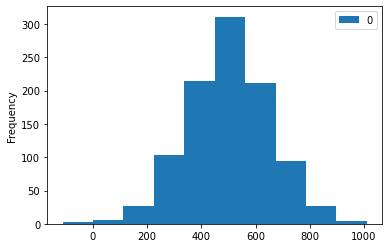

In [3]:
# Varsayımlar 
# 1. Normallik varsayımı
import pandas as pd
pd.DataFrame(arr).plot.hist()

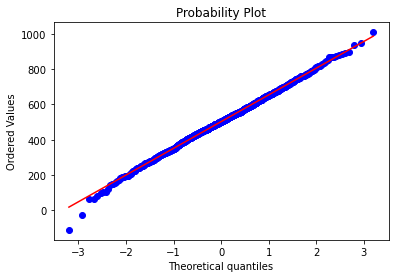

In [4]:
import pylab
stats.probplot(arr, dist='norm', plot=pylab)
pylab.show()

In [5]:
# Shapiro-Wilks Testi

In [6]:
from scipy.stats import shapiro
shapiro(arr)

ShapiroResult(statistic=0.9984782934188843, pvalue=0.5405543446540833)

In [7]:
stats.ttest_1samp(arr, popmean=450)

Ttest_1sampResult(statistic=10.982281987657927, pvalue=1.4334326539085875e-26)

In [8]:
# Nonparametrik Tek Örneklem Testi

In [9]:
from statsmodels.stats.descriptivestats import sign_test

In [10]:
sign_test(arr, 500)

(11.0, 0.5066600426249498)

# Tek örneklem oran testi 
- oransal bir ifade test edilmek istenildiğinde kullanırlır 
- hipotezler
- z 
- n > 30

In [11]:
from statsmodels.stats.proportion import proportions_ztest

In [12]:
count = 40
nobs = 500
value = 0.125

In [13]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

# Bağımsız İki Örneklem T Testi (AB Testi)

- İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.
- hipotezler 
- Varsayımlar 
    * t formülleri
- Normallik 
- Varyans homejenliği

In [14]:
A = pd.DataFrame([34,21,34,37,34,34,56,32,55,38,35,34,21,54,37,45,32,21,34,52,12,34,12])
B = pd.DataFrame([45,23,54,47,42,33,97,92,55,76,65,84,61,54,66,35,39,14,44,56,11,35,16])

Grup_A = np.arange(len(A))
Grup_A = pd.DataFrame(Grup_A)
Grup_A[:] = "A"
A = pd.concat([A, Grup_A], axis=1)

Grup_B = np.arange(len(B))
Grup_B = pd.DataFrame(Grup_B)
Grup_B[:] = "B"
B = pd.concat([B, Grup_B], axis=1)

AB = pd.concat([A, B])
AB.columns = ["Gelir", "Grup"]
print(AB.head())
print(AB.tail())

   Gelir Grup
0     34    A
1     21    A
2     34    A
3     37    A
4     34    A
    Gelir Grup
18     44    B
19     56    B
20     11    B
21     35    B
22     16    B


<AxesSubplot:xlabel='Grup', ylabel='Gelir'>

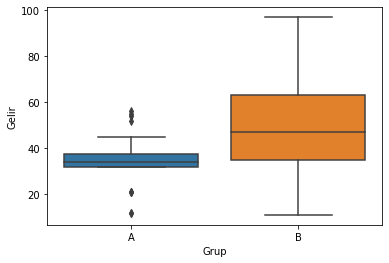

In [15]:
import seaborn as sns
sns.boxplot(x="Grup", y="Gelir", data=AB)

In [16]:
# normallik testi
shapiro(AB[AB.Grup == "A"].Gelir)

ShapiroResult(statistic=0.9119639992713928, pvalue=0.044934745877981186)

In [17]:
shapiro(AB[AB.Grup == "B"].Gelir)

ShapiroResult(statistic=0.9717252850532532, pvalue=0.7302184104919434)

In [18]:
# varyans homojenliği varsayımı
stats.levene(AB[AB.Grup == "A"].Gelir, AB[AB.Grup == "B"].Gelir)

LeveneResult(statistic=8.234907195454921, pvalue=0.0062922702935843625)

In [19]:
test_istatistigi, pvalue = stats.ttest_ind(AB[AB.Grup == "A"].Gelir, AB[AB.Grup == "B"].Gelir, equal_var=True)
print(" Test İstatistiği = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Test İstatistiği = -2.7206
 P-value = 0.0093


# Nonparametrik Bağımsız İki Örneklem Testi

In [20]:
stats.mannwhitneyu(AB[AB.Grup == "A"].Gelir, AB[AB.Grup == "B"].Gelir)

MannwhitneyuResult(statistic=146.5, pvalue=0.004836717671249619)

In [21]:
test_istatistigi, pvalue = stats.mannwhitneyu(AB[AB.Grup == "A"].Gelir, AB[AB.Grup == "B"].Gelir)
print(" Test İstatistiği = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Test İstatistiği = 146.5000
 P-value = 0.0048


# Bağımlı İki Örneklem T Testi

- Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.
- hipotezler
- t formülü
- Varsayımlar 
    * Normallik 
    * Varyans Homojenliği

In [22]:
df1 = pd.DataFrame(np.random.normal(50, 10, 1000))
df2 = pd.DataFrame(np.random.normal(60, 10, 1000))

df_1 = np.arange(len(df1))
df_1 = pd.DataFrame(df_1)
df_1[:] = "ilk"
df1 = pd.concat([df1, df_1], axis=1)

df_2 = np.arange(len(df2))
df_2 = pd.DataFrame(df_2)
df_2[:] = "son"
df2 = pd.concat([df2, df_2], axis=1)

df = pd.concat([df1, df2])
df.columns = ["Score", "Durum"]
print(df.head())
print(df.tail())

       Score Durum
0  52.381678   ilk
1  49.372310   ilk
2  69.705307   ilk
3  37.714628   ilk
4  52.338325   ilk
         Score Durum
995  62.370051   son
996  64.955254   son
997  48.498395   son
998  50.368204   son
999  51.416524   son


<AxesSubplot:xlabel='Durum', ylabel='Score'>

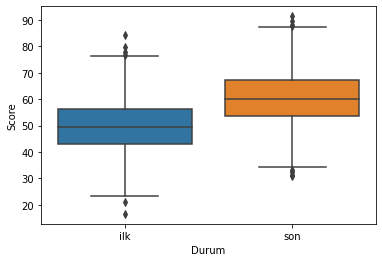

In [23]:
sns.boxplot(x=df.Durum, y=df.Score)

In [24]:
# Varsayım kontrolu 
shapiro(df[df.Durum == "ilk"].Score)

ShapiroResult(statistic=0.9993211627006531, pvalue=0.9821730256080627)

In [25]:
shapiro(df[df.Durum == "son"].Score)

ShapiroResult(statistic=0.9988252520561218, pvalue=0.7711648941040039)

In [26]:
test_istatistigi, pvalue = stats.levene(df[df.Durum == "ilk"].Score, df[df.Durum == "son"].Score)
print(" Test İstatistiği = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Test İstatistiği = 0.0575
 P-value = 0.8106


In [27]:
stats.ttest_rel(df[df.Durum == "ilk"].Score, df[df.Durum == "son"].Score)

Ttest_relResult(statistic=-23.722310075327155, pvalue=4.979876682726434e-99)

In [28]:
test_istatistigi, pvalue = stats.ttest_rel(df[df.Durum == "ilk"].Score, df[df.Durum == "son"].Score)
print(" Test İstatistiği = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Test İstatistiği = -23.7223
 P-value = 0.0000


# Nonparametrik Bağımlı İki Örneklem Testi

In [29]:
stats.wilcoxon(df[df.Durum == "ilk"].Score, df[df.Durum == "son"].Score)

WilcoxonResult(statistic=72422.0, pvalue=2.1545452217733784e-84)

In [30]:
test_istatistigi, pvalue = stats.wilcoxon(df[df.Durum == "ilk"].Score, df[df.Durum == "son"].Score)
print(" Test İstatistiği = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Test İstatistiği = 72422.0000
 P-value = 0.0000


# İki Örneklem Oran Testi

- İki oran arasında karşılaştırma yapmak için kullanılır.
- Hipotezler
- z 
- varsayımlar

In [31]:
from statsmodels.stats.proportion import proportions_ztest

In [32]:
import numpy as np
basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000,1100])

In [33]:
proportions_ztest(count=basari_sayisi, nobs=gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

# Varyans Analizi (ANOVA)
- İki ya da daha fazla grup ortalaması arasında istatistiksel olarak anlamlı farklılık olup olmadığı öğrenilmek istenildiğinde kullanılır.
- Hipotezler
    * Eşitlik üzerine kurulur
        - ${h_0: \mu_1 = \mu_2 = \mu_3}$
        - ${h_1: \mu \neq \mu_n}$
- Grand mean: genel ortalaması 
- mean: grup ortalaması
- within group 
    * Farklı popülasyonlara ait farklı gruplar arasındaki farkın tespit edilmesinde kullanılır
- between group
    * Aynı popülasyona ait farklı gruplar arasındaki farkı tespit edilmesinde kullanırlır 
- Varsayımlar
 * Bağımsız değişken 2 veya daha fazla kategoriden oluşmalıdır. Yani iki veya daha fazla grup olmalı
 * Gruplar birbirinden bağımsız olmalıdır
 * Bağımlı değişken aralık veya oran içeren değerlerden oluşmalıdır(sürekli veriler) 
 * Bağımlı değişken her bir kategori için normal dağılım göstermelidir. Bazı durumlarda artık değrlerinin normal dağılması bu varsaım  sağlayabilmektedir
 * Gruplar varyans homejenliğini sağlamalıdır
 

In [91]:
A = pd.DataFrame(np.random.normal(50, 10, 1000))
B = pd.DataFrame(np.random.normal(60, 10, 1000))
C = pd.DataFrame(np.random.normal(70, 10, 1000))

dfs = [A, B, C]
ABC = pd.concat(dfs, axis=1)
ABC.columns = ["A", "B", "C"]
ABC.head()

,A,B,C
0,65.148170,64.139987,58.353592
1,66.626714,58.314032,88.816337
2,52.686417,34.979075,72.462163
3,50.118872,48.748952,80.130607
4,58.541072,59.432978,63.541456


In [87]:
data = pd.concat([A,B,C], axis=0)

In [35]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,49.263353,10.305366,16.204409,42.164313,49.230199,56.310088,83.626594
B,1000.0,59.771437,10.404958,24.101008,53.043797,59.758226,67.040389,90.998331
C,1000.0,70.310510,10.457666,38.083647,62.815891,70.234142,77.975970,102.227778


In [36]:
# Mean
print("A Mean", A.mean())
print("B Mean", B.mean())
print("C Mean", C.mean())

A Mean 0    49.263353
dtype: float64
B Mean 0    59.771437
dtype: float64
C Mean 0    70.31051
dtype: float64


In [37]:
# Grand Mean
print("Geand Mean", ((A.mean() + B.mean() + C.mean())/3))

Geand Mean 0    59.781767
dtype: float64


In [38]:
# Varsayım kontrolü 
# Normallik kontrolü
print("A", shapiro(ABC.A))
print("B", shapiro(ABC.B))
print("C", shapiro(ABC.C))

A ShapiroResult(statistic=0.9989649057388306, pvalue=0.854517936706543)
B ShapiroResult(statistic=0.9980486035346985, pvalue=0.3035885691642761)
C ShapiroResult(statistic=0.998164176940918, pvalue=0.35833999514579773)


In [39]:
# Homojenlik Kontolü
stats.levene(ABC.A, ABC.B, ABC.C)

LeveneResult(statistic=0.7013970740092087, pvalue=0.49597340377823995)

In [40]:
from scipy.stats import f_oneway
f_oneway(ABC.A, ABC.B, ABC.C)

F_onewayResult(statistic=1025.9733180491426, pvalue=0.0)

In [41]:
test_istatistigi, pvalue = f_oneway(ABC.A, ABC.B, ABC.C)
print(" Test İstatistiği = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Test İstatistiği = 1025.9733
 P-value = 0.0000


In [42]:
# Nonparametrik hipotez testi
from scipy.stats import kruskal
kruskal(ABC.A, ABC.B, ABC.C)

KruskalResult(statistic=1253.9371712175944, pvalue=5.140471355037448e-273)

In [43]:
test_istatistigi, pvalue = kruskal(ABC.A, ABC.B, ABC.C)
print(" Test İstatistiği = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Test İstatistiği = 1253.9372
 P-value = 0.0000


# Korelasyon Analizi

- Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti hakkında bilgi verir.
- katsayılar (1,-1)
- hipotezler
- r ve t 
- varsayımlar

In [44]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
df["total_bill"] = df["total_bill"] - df["tip"]
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='tip', ylabel='total_bill'>

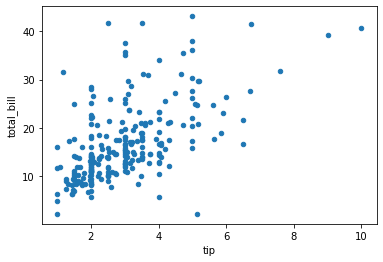

In [46]:
df.plot.scatter("tip", "total_bill")

In [47]:
shapiro(df.tip)

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

In [48]:
shapiro(df.total_bill)

ShapiroResult(statistic=0.9135652184486389, pvalue=1.1060377613780759e-10)

In [49]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [50]:
df["tip"].corr(df["total_bill"], method="spearman")

0.593691939408997

In [51]:
from scipy.stats import pearsonr

In [52]:
test_istatistigi, pvalue = pearsonr(df.tip, df.total_bill)
print(" Korelasyon Katsayısı = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Korelasyon Katsayısı = 0.5767
 P-value = 0.0000


In [53]:
stats.spearmanr(df.tip, df.total_bill)

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [54]:
test_istatistigi, pvalue = stats.spearmanr(df.tip, df.total_bill)
print(" Korelasyon Katsayısı = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Korelasyon Katsayısı = 0.5937
 P-value = 0.0000


In [55]:
stats.kendalltau(df.tip, df.total_bill)

KendalltauResult(correlation=0.4400790074919885, pvalue=7.131027725873721e-24)

In [56]:
test_istatistigi, pvalue = stats.kendalltau(df.tip, df.total_bill)
print(" Korelasyon Katsayısı = %.4f\n P-value = %.4f" % (test_istatistigi, pvalue))

 Korelasyon Katsayısı = 0.4401
 P-value = 0.0000


# Chi-Square Analizi

- gözlenen ve beklenen frekanslar arasındaki farkın anlamlı olup olmadığını test etmek için kullanırlır.
- formül

In [57]:
sample = np.array([2,4,14,7,8,9])
print(np.sum(sample))
expected = np.sum(sample) / len(sample)
print(expected)
chi_value = np.sum(((sample - expected)**2)/expected)
print(chi_value)

44
7.333333333333333
11.90909090909091


In [58]:
from scipy.stats import chi2
print(chi2.isf(0.05, 6))

12.59158724374398


<a id=4></a>
## Kaynaklar

#### Websiteleri

- https://tr.wikipedia.org/wiki/Anasayfa

#### Kitaplar

- https://web.stanford.edu/~hastie/ElemStatLearn/

#### Kurslar

- https://www.udemy.com/course/python-egitimi/
- https://www.udemy.com/course/istatistik-python-adan-zye-temel-istatistik-bilimi-6/
